# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.6, 1)

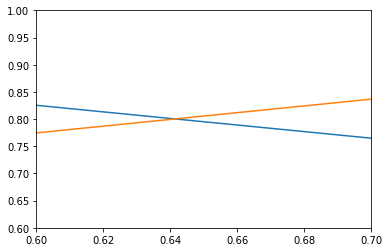

In [2]:
xs = np.arange(0, 3., 0.1)
ys_cos = np.cos(xs)
ys_sqrt = np.sqrt(xs)

plt.plot(xs, ys_cos)
plt.plot(xs, ys_sqrt)

plt.xlim(0.6, 0.7)
plt.ylim(0.6, 1)

In [3]:
def f(x):
    if x < 0:
        raise ValueError(f"x can't be negative, got {x}")
    return np.cos(x) - np.sqrt(x)

def solve(func, a, eps=0.001, initial_value=1, verbose=False):
    x =  initial_value
    steps_amount = 0
    while True:
        next_x = x + a * func(x)
        steps_amount += 1
        if verbose:
            print(next_x, end='\r')
        if abs(next_x - x) <= eps:
            return steps_amount, next_x
        x = next_x

_, root = solve(f, 1)
print(root)

0.6417669098926798


Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [4]:
iterations, root = solve(
    lambda x: np.cos(x) - np.sqrt(x),
    a=1,
    eps=0.001
)
print(iterations)
print(root)

6
0.6417669098926798


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [5]:
def inverse_quadratic_interpolation(f, x0, x1, x2, eps=1e-5):
    iterations_count = 0
    while abs(x1-x0) > eps:
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
        L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
        L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
        new = L0 + L1 + L2
        x0, x1, x2 = new, x0, x1
        iterations_count += 1
    return iterations_count, x0

In [6]:
from scipy.special import cotdg

In [7]:
# xs - градусы
xs = [0.6, 0.8, 1]
ys = cotdg(xs)

In [8]:
iters, x0 = inverse_quadratic_interpolation(
    cotdg,
    *xs,
    eps=0.001
)
print(iters)
print(x0)

11
89.9999999644877


In [9]:
cotdg(90)

0.0

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [10]:
def discrete_method_approx(f, x, h=.00000001):
    return (f(x+h) - f(x)) / h
 
def newton_raphson(f, x, tolerance=.001):
    steps_taken = 0
 
    while abs(f(x)) > tolerance:
        df = discrete_method_approx(f, x)
        x = x - f(x)/df
        steps_taken += 1
    return x, steps_taken
 
f = lambda z: z**3 - 1
 
root, steps = newton_raphson(f, 1)
print(f"root is: {root}")
print("steps taken:", steps)

root is: 1
steps taken: 0


In [11]:
import itertools
roots = [
    (-0.5 + 0.86j),
    (-0.5 - 0.86j),
    1
]
colors = 'rgb'
root_colors_dict = dict(zip(roots, colors))

def find_closest_root(value):
    for root in roots:
        if np.isclose(value, root, atol=0.1):
            return root
    raise ValueError(f"Can't find closest root with atol=0.1, got {value}")


real_list = np.arange(-3, 3, 0.05)
imag_list = np.arange(-3, 3, 0.05)
all_values = list(itertools.product(real_list, imag_list))

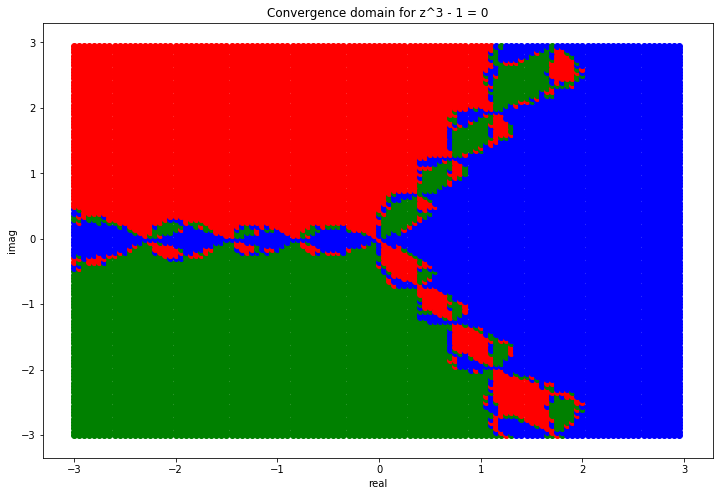

In [18]:
plt.figure(figsize=(12, 8))

for real, imag in all_values:
    value = real + imag * 1j
    possible_root, _ = newton_raphson(f, value)
    value = find_closest_root(possible_root)
        
    plt.scatter(real, imag, c=root_colors_dict[value])

plt.title('Convergence domain for z^3 - 1 = 0')
plt.xlabel('real')
plt.ylabel('imag')
plt.show()

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).